<a href="https://colab.research.google.com/github/MastafaF/Lab2_EPITA/blob/main/Lab2_EPITA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import os 
import pandas as pd 

from IPython.display import HTML

In [91]:
%%capture
! pip install fasttext

# I. Language detection (24 points)

## Setup 

In [92]:
! git clone https://github.com/MastafaF/LanguageDetection.git

fatal : le chemin de destination 'LanguageDetection' existe déjà et n'est pas un répertoire vide.


In [93]:
os.listdir("./LanguageDetection")

['dataset.csv',
 '.git',
 'dataset.csv.zip',
 'README.md',
 '.gitignore',
 'LICENSE']

In [94]:
# CD the LanguageDetection folder - we are working in the below folder now
os.chdir("./LanguageDetection")

In [95]:
! unzip dataset.csv.zip

Archive:  dataset.csv.zip
replace dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


## Data Exploration Analysis

In [96]:
data = pd.read_csv("./dataset.csv")

In [97]:
os.chdir("../")

In [98]:
# Sample of the data
HTML(data[data.language == "Chinese"].sample().to_html())

,Text,language
2768,比什凯克流通吉尔吉斯斯坦的货币，索姆。索姆的币值有规律的浮动，但到年月为止，对美元的平均汇率为索姆兑美元。比什凯克的经济主要依靠农业，出产大量的水果、蔬菜和家畜，在偏远地区并行着实物交易的制度。比什凯克的大街通常布满了卖农产品的商人，整条街犹如一个大市场。在市中心的主要地段具有更加城市化的景观，如银行、商铺、市场和购物商场。最受欢迎的是当下流行的工匠制作的手工艺品；包括雕塑、雕刻品、油画以及以自然岩石为材料的雕塑。,Chinese


### Question 1. Describe the distribution of languages and give at least two comments about the dataset. (1 point)

<AxesSubplot: >

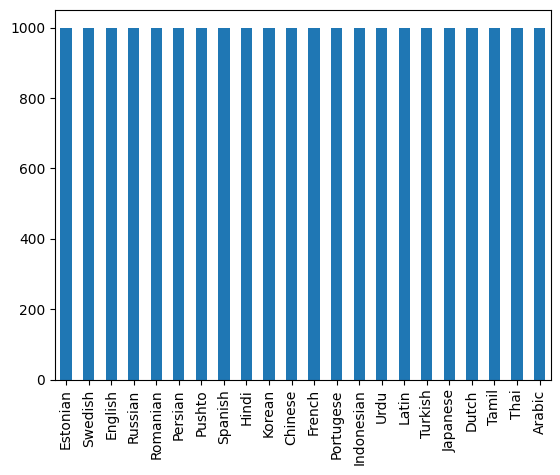

In [99]:
################################################
# your implementation goes here

data["language"].value_counts().plot(kind='bar')

##################################################

The distribution is equal, there is the exact same number of sentences for all of the 22 languages in the dataset. We can see that this dataset does not have a lot of languages (only 22), but the languages are very varied with languages from all around the world, some being popular languages (english, chinese), and some being less popular (Urdu, Pushto).

### Question 2-5. Explore the data with your own preprocessing and train your model

In [100]:
import numpy as np
from sklearn.model_selection import train_test_split

X=data['Text']
y=data['language']


################################################
# your implementation goes here
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import string

def preprocess(text, language) :

  punctuation = string.punctuation
  
  # add asiatic punctuation
  punctuation += "，。！？【】（）％＃＠＆《》"
  text = text.lower()
  text = text.translate(str.maketrans('', '', punctuation))

  # add space between asiatic characters so that CountVectorizer tokenizer works
  if language == "Japanese" or language == "Chinese" :
    text = " ".join(text)

  return text

for i in range(len(X)) :
  X[i] = preprocess(X[i], y[i])

# We modify the token pattern to include 1 character words and asiatic characters
cv = CountVectorizer(max_features=15000, token_pattern=r'(?u)\b[^ ]+\b')
X = cv.fit_transform(X).toarray()

encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

model = MultinomialNB()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Train accuracy : " + str(accuracy_score(y_train, y_train_pred)))
print("Test accuracy : " + str(accuracy_score(y_test, y_test_pred)))

def detect_language(text) :
  prediction = model.predict(cv.transform([text]))
  return encoder.inverse_transform(prediction).item()  


print("Test on a few sentences :")

str1 = 'Bonjour je suis une délicieuse chocolatine'
str2 = 'Hello i like to drink tea and invade foreign countries'
str3 = 'Hola me gusta los pollos hermanos'

print(str1 + ' : ' + detect_language(str1))
print(str2 + ' : ' + detect_language(str2))
print(str3 + ' : ' + detect_language(str3))

################################################

Train accuracy : 0.9694318181818182
Test accuracy : 0.9665909090909091
Test on a few sentences :
Bonjour je suis une délicieuse chocolatine : French
Hello i like to drink tea and invade foreign countries : English
Hola me gusta los pollos hermanos : Spanish


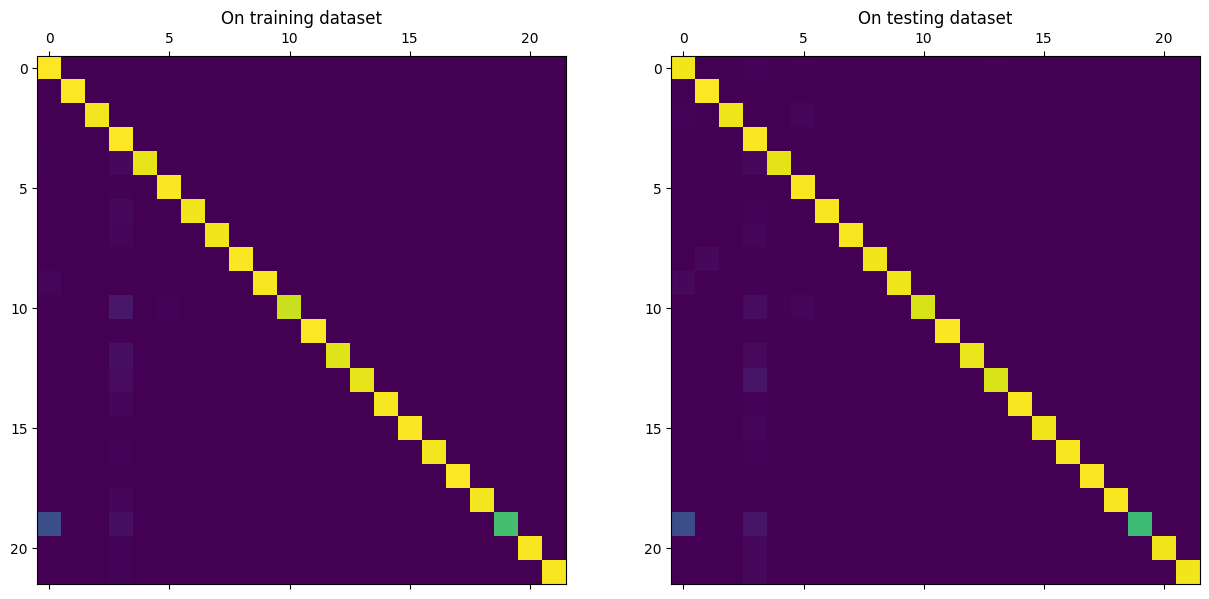

In [101]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 15]

_, (ax1, ax2) = plt.subplots(ncols=2)


ax1.set_title("On training dataset")
ax2.set_title("On testing dataset")

ax1.matshow(confusion_matrix(y_train, y_train_pred))
ax2.matshow(confusion_matrix(y_test, y_test_pred))

The overall accuracy is 96% which is pretty good. However, the tokenization of chinese and japanese is not perfect so it could be improved.
From the confusion matrix we can see our model has a little trouble with arabic and thai (index 0 and 19). We can also see that sometimes, languages are misinterpreted as english (index 3), which may be caused to the overpresence of english culture in the world (leading to english words sometimes used in non-english languages).

## FastText for language detection

## FastText training setup 

In [102]:
! wget http://downloads.tatoeba.org/exports/sentences.tar.bz2

URL transformed to HTTPS due to an HSTS policy
--2023-01-03 12:56:10--  https://downloads.tatoeba.org/exports/sentences.tar.bz2
Certificat de l’autorité de certification « /etc/ssl/certs/ca-certificates.crt » chargé
Résolution de downloads.tatoeba.org (downloads.tatoeba.org)… 94.130.77.194
Connexion à downloads.tatoeba.org (downloads.tatoeba.org)|94.130.77.194|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 172433658 (164M) [application/octet-stream]
Sauvegarde en : « sentences.tar.bz2 »

sentences.tar.bz2   100%[===================>] 164,45M  2,07MB/s    ds 79s     

2023-01-03 12:57:29 (2,07 MB/s) — « sentences.tar.bz2 » sauvegardé [172433658/172433658]



In [103]:
! bunzip2 sentences.tar.bz2

bunzip2: Output file sentences.tar already exists.


In [104]:
! ls

all.txt		  LanguageDetection  sentences.tar	train.txt
Lab2_EPITA.ipynb  Practical_2.pdf    sentences.tar.bz2	valid.txt
langdetect.bin	  sentences.csv      test.txt


In [105]:
! tar xvf sentences.tar

sentences.csv


In [106]:
! ls

all.txt		  LanguageDetection  sentences.tar	train.txt
Lab2_EPITA.ipynb  Practical_2.pdf    sentences.tar.bz2	valid.txt
langdetect.bin	  sentences.csv      test.txt


In [107]:
! head - sentences.csv

==> entrée standard <==
^C


In [108]:
! awk -F"\t" '{print"__label__"$2" "$3}' < sentences.csv | shuf > all.txt

In [109]:
! ls

all.txt		  LanguageDetection  sentences.tar	train.txt
Lab2_EPITA.ipynb  Practical_2.pdf    sentences.tar.bz2	valid.txt
langdetect.bin	  sentences.csv      test.txt


In [110]:
! head -5 all.txt

__label__hun Nemeslelkű.
__label__por Tirem essa gata daqui, por favor! Ela está bagunçando tudo.
__label__tur O soruları yanıtladı.
__label__fin Yritetäänpä tehdä jotain.
__label__rus Я смог переплыть через Ла-Манш.


In [111]:
! head -n 10000 all.txt > valid.txt

In [112]:
! tail -n +10001 all.txt > train.txt

In [113]:
! head -5 train.txt

__label__ita Sto andando in banca.
__label__ber Inimt-iyi-d d acu ay tettwalimt deg tugna-a.
__label__rus Возможно, я заблуждаюсь.
__label__tur Annen senin için odanı temizler mi?
__label__eng He was drinking the beer.


### Question 6.1. Train fasttext model on Tatoeba (2 points)

In [114]:
%%time
import fasttext

# Check the fasttext library and implement the training
###########################################

# your implementation goes here

model = fasttext.train_supervised(input="train.txt")

################################################

# @TODO: Save your model when trained 
model.save_model("langdetect.bin")

Read 89M words
Number of words:  4170153
Number of labels: 415
Progress: 100.0% words/sec/thread:   85446 lr: -0.000000 avg.loss:  0.132090 ETA:   0h 0m 0s ETA:   0h 5m 5s ETA:   0h 3m27s  85302 lr:  0.017681 avg.loss:  0.153148 ETA:   0h 1m 1s 0.016055 avg.loss:  0.150790 ETA:   0h 0m56s

CPU times: user 1h 26min 44s, sys: 4.85 s, total: 1h 26min 49s
Wall time: 6min 10s


Progress: 100.0% words/sec/thread:   85446 lr:  0.000000 avg.loss:  0.132085 ETA:   0h 0m 0s


In [115]:
# Sanity check 
model.predict("I am French and I love English")

(('__label__eng',), array([1.00000834]))

### Question 6.2. Evaluate performance of fasttext model on valid.txt (1 point)

In [116]:
# Hint: Create dataframe from valid.txt and evaluate performance 

###########################################

# your implementation goes here

_, precision, _ = model.test("valid.txt")

print("Accuracy on valid.txt : " + str(precision))
################################################

Accuracy on valid.txt : 0.9576


### Question 7 & 8. Test your FastText model on the same dataset as question 5.

In [117]:
###########################################

# your implementation goes here

to_iso = {
    'Arabic' : "ara",
    'Chinese' : "cmn",
    'Dutch' : "nld",
    'English' : "eng",
    'Estonian' : "est",
    'French' : "fra",
    'Hindi' : "hin",
    'Indonesian' : "ind",
    'Japanese' : "jpn",
    'Korean' : "kor",
    'Latin' : "lat",
    'Persian' : "pes",
    'Portugese' : "por",
    'Pushto' : "pus",
    'Romanian' : "ron",
    'Russian' : "rus",
    'Spanish' : "spa",
    'Swedish' : "swe",
    'Tamil' : "tam",
    'Thai' : "tha",
    'Turkish' : "tur",
    'Urdu' : "urd" 
}

def fasttext_file(filename, x, y) -> None:
    """Save x and y data into a fasttext-like file.
    Args:
        filename: Name of the file to generate.
        x: List of strings.
        y: List of labels (x's labels).
    """
    file = open(filename, 'w')
    for text, label in zip(x, y):
        file.write(f"__label__{to_iso[encoder.inverse_transform([label]).item()]} {text}\n")
    file.close()

X=data['Text']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

fasttext_file('test.txt', X_test, y_test)

_, precision, _ = model.test("test.txt")

print("Accuracy on test.txt : " + str(precision))

################################################

Accuracy on test.txt : 0.8011363636363636


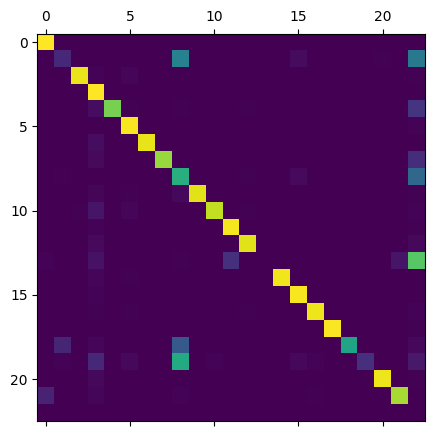

In [121]:
###########################################

# your implementation goes here

to_word = dict([reversed(i) for i in to_iso.items()])

plt.rcParams['figure.figsize'] = [10, 5]

y_pred = []

for text in X_test :
    prediction = model.predict(text)[0][0][-3:]
    if (to_word.get(prediction) != None) :
        y_pred.append(encoder.transform([to_word[prediction]]).item())
    else :
        y_pred.append(len(encoder.classes_))

plt.matshow(confusion_matrix(y_test, y_pred))

################################################

The performance is not as good when testing with the dataset from question 1.5, as we obtained an accuracy of 80 %. We can see from the confusion matrix that our fasttext model has problem with specific languages : pushto (13) which it identifies as ottoman turkish, chinese (1) which it identifies as japanese (8), and thai (19) which it often identifies with different other languages. This may be because of difference between the dataset from question 1.5 and the Tatoeba dataset. For example, the Tatoeba dataset contains much more languages than this dataset, which leads our trained model to often classify a sentence with a language that is not present in the dataset. The tatoeba dataset also mostly contains short sentences, while our dataset sometimes has long paragraphs of multiple sentences (especially true for chinese).

### Compute precision and recall for Japanese, compare with sklearn

In [144]:
def compute_precision_recall(y, y_pred, class_name) :
    class_idx = encoder.transform([class_name]).item()
    correct = 0
    predicted = 0
    actual = 0
    
    for i in range(len(y)) :
        if y[i] == class_idx :
            actual += 1
            
        if y_pred[i] == class_idx :
            predicted += 1
            
            if y[i] == y_pred[i] :
                correct += 1
    return correct / predicted, correct / actual

jpn_p, jpn_r = compute_precision_recall(y_test, y_pred, "Japanese")

print("Precision for japanese is " + str(jpn_p * 100))
print("Recall for japanese is " + str(jpn_r * 100))

Precision for japanese is 31.5
Recall for japanese is 63.0


In [148]:
from sklearn import metrics 

dic = metrics.classification_report(y_test, y_pred, zero_division=0, output_dict=True)
class_idx = str(encoder.transform(["Japanese"]).item())

print("Sklearn precision for japanese is " + str(dic[class_idx]["precision"] * 100))
print("Sklearn recall for japanese is " + str(dic[class_idx]["recall"] * 100))


Sklearn precision for japanese is 31.5
Sklearn recall for japanese is 63.0


# II. Rotate two semantic spaces (23 points)

## Setup

In [ ]:
# If on Colab, upload the version of MUSE on https://github.com/MegaloPat/NLP3
# The original version of MUSE is bugged

if 'google.colab' in str(get_ipython()):
  ! wget https://github.com/MegaloPat/NLP3/raw/main/LAB02/MUSE.zip

--2022-12-24 09:18:57--  https://github.com/MegaloPat/NLP3/raw/main/LAB02/MUSE.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MegaloPat/NLP3/main/LAB02/MUSE.zip [following]
--2022-12-24 09:18:58--  https://raw.githubusercontent.com/MegaloPat/NLP3/main/LAB02/MUSE.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 409515 (400K) [application/zip]
Saving to: ‘MUSE.zip’

MUSE.zip            100%[===================>] 399.92K  --.-KB/s    in 0.003s  

2022-12-24 09:18:58 (149 MB/s) - ‘MUSE.zip’ saved [409515/409515]



In [ ]:
! unzip MUSE.zip


Archive:  MUSE.zip
   creating: MUSE/
   creating: MUSE/.git/
   creating: MUSE/.git/refs/
   creating: MUSE/.git/refs/tags/
   creating: MUSE/.git/refs/heads/
 extracting: MUSE/.git/refs/heads/main  
 extracting: MUSE/.git/refs/heads/automated_fixup_contributing_file_exists  
   creating: MUSE/.git/refs/remotes/
   creating: MUSE/.git/refs/remotes/origin/
 extracting: MUSE/.git/refs/remotes/origin/HEAD  
   creating: MUSE/.git/info/
  inflating: MUSE/.git/info/exclude  
  inflating: MUSE/.git/index         
   creating: MUSE/.git/objects/
   creating: MUSE/.git/objects/info/
   creating: MUSE/.git/objects/pack/
  inflating: MUSE/.git/objects/pack/pack-19aa2974edd15da501b3a823f7648d13c8551234.pack  
  inflating: MUSE/.git/objects/pack/pack-19aa2974edd15da501b3a823f7648d13c8551234.idx  
 extracting: MUSE/.git/ORIG_HEAD     
   creating: MUSE/.git/logs/
   creating: MUSE/.git/logs/refs/
   creating: MUSE/.git/logs/refs/heads/
  inflating: MUSE/.git/logs/refs/heads/main  
  inflating: MUS

In [ ]:
!curl -Lo MUSE/data/wiki.fr.vec https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.fr.vec
!curl -Lo MUSE/data/wiki.en.vec https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.vec


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2886M  100 2886M    0     0  12.2M      0  0:03:56  0:03:56 --:--:-- 12.3M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6291M  100 6291M    0     0  10.6M      0  0:09:50  0:09:50 --:--:-- 12.7M


In [ ]:
!pip install faiss-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85.5 MB 98 kB/s 


## Launch the training

In [ ]:
os.chdir("MUSE")

In [ ]:
# export is disabled as it is too RAM heavy for colab
!python unsupervised.py --src_lang fr --tgt_lang en --src_emb data/wiki.fr.vec --tgt_emb data/wiki.en.vec --n_epochs 1 --exp_name "fr_to_en" --exp_path "./" --export "" # --dis_optimizer "adam" --map_optimizer "adam"

INFO - 12/24/22 09:33:02 - 0:00:00 - ============ Initialized logger ============
INFO - 12/24/22 09:33:02 - 0:00:00 - adversarial: True
                                     batch_size: 32
                                     cuda: True
                                     dico_build: S2T
                                     dico_eval: default
                                     dico_max_rank: 15000
                                     dico_max_size: 0
                                     dico_method: csls_knn_10
                                     dico_min_size: 0
                                     dico_threshold: 0
                                     dis_clip_weights: 0
                                     dis_dropout: 0.0
                                     dis_hid_dim: 2048
                                     dis_input_dropout: 0.1
                                     dis_lambda: 1
                                     dis_layers: 2
                                     dis_mo

## Load the best mapping

In [ ]:
exp_id = !ls fr_to_en
exp_id = exp_id[0]

In [ ]:
import torch
mapping_data = torch.load("fr_to_en/" + exp_id + "/best_mapping.pth")
mapping = torch.nn.Linear(300,300, bias=False)
mapping.weight.data = torch.from_numpy(mapping_data)

## Load the french/english embeddings

In [ ]:
from gensim.models import KeyedVectors
wv_fr = KeyedVectors.load_word2vec_format('data/wiki.fr.vec', binary=False)
wv_en = KeyedVectors.load_word2vec_format('data/wiki.en.vec', binary=False)

## Try the mapping on a few words

In [ ]:
mots = ["bonjour", "cochon", "triste", "tricher", "rigolo", "francais", "anglais"]
words = ["hello", "pig", "sad", "cheat", "funny", "french", "english"]

encoded_mots = [wv_fr[mot] for mot in mots]
encoded_words = [wv_en[word] for word in words]

In [ ]:
mapped_mots = [mapping(torch.from_numpy(mot)).detach().numpy() for mot in encoded_mots]

<ipython-input-12-3410aa330cdf>:1: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:199.)
  mapped_mots = [mapping(torch.from_numpy(mot)).detach().numpy() for mot in encoded_mots]


In [ ]:
from sklearn.decomposition import TruncatedSVD

def reduce_to_k_dim(M, k=2):
    n_iters = 10     
    M_reduced = None

    svd = TruncatedSVD(n_components=k, n_iter=n_iters)
    M_reduced = svd.fit_transform(M)

    return M_reduced



In [ ]:
pts = reduce_to_k_dim(encoded_mots + encoded_words)
pts_mapped = reduce_to_k_dim(mapped_mots + encoded_words)
labels = mots + words

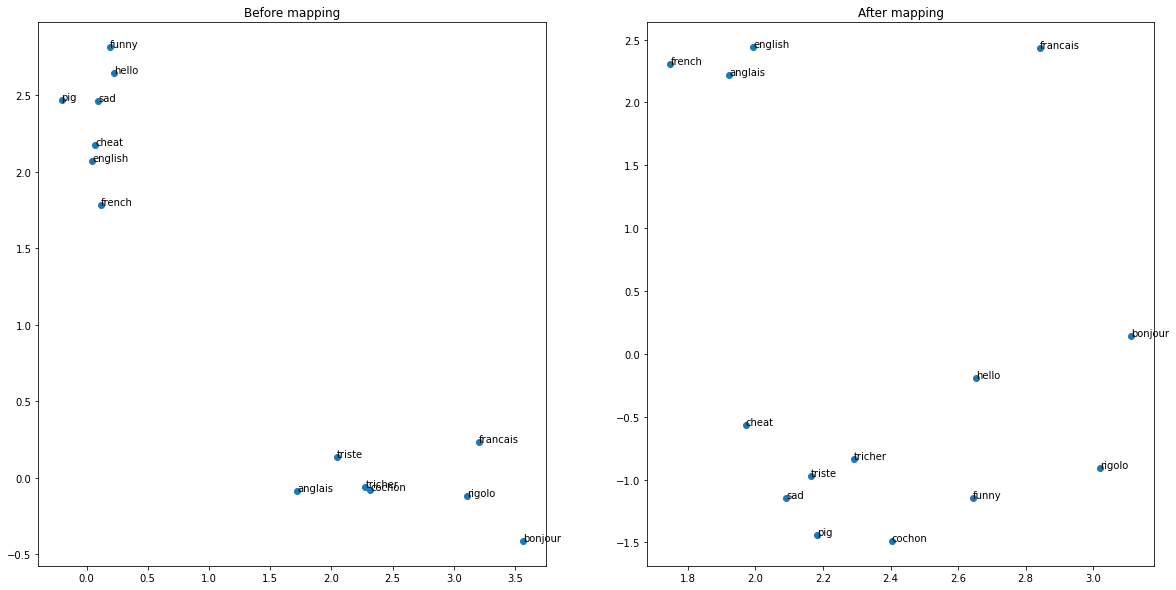

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]


fig, (ax1, ax2) = plt.subplots(ncols=2)


ax1.set_title("Before mapping")
ax2.set_title("After mapping")

xs1 = [el[0] for el in pts]
ys1 = [el[1] for el in pts]
ax1.scatter(xs1, ys1)


xs2 = [el[0] for el in pts_mapped]
ys2 = [el[1] for el in pts_mapped]
ax2.scatter(xs2, ys2)


for i, txt in enumerate(labels):
    ax1.annotate(txt, (xs1[i], ys1[i]))
    ax2.annotate(txt, (xs2[i], ys2[i]))


The results do not show the best performance (English words may be far apart from their mapped french counterpart) but that might be due to the SVD. However, we can see that the English and French space without the mapping are clearly separated while the mapping merges the french space with the English one. This means we can at least see that the rotation of the french space probably worked.

## Apply the translation approach

In [ ]:
wv_en.init_sims(replace=True)

In [ ]:
wv_en.similar_by_vector(mapped_mots[1])

[('pig', 0.6737393736839294),
 ('chicken', 0.6134365200996399),
 ('goat', 0.6071912050247192),
 ('dog', 0.6024898290634155),
 ('rabbit', 0.5933083295822144),
 ('chickens', 0.5733795762062073),
 ('cow', 0.5607603192329407),
 ('stinky', 0.5455542206764221),
 ('rabbit,', 0.538522481918335),
 ('chickening', 0.5382922887802124)]

In [ ]:
def translate_word(word, src_emb, tgt_emb, mapping) :
  encoded_word = src_emb[word]
  mapped_word = mapping(torch.from_numpy(encoded_word)).detach().numpy()
  most_similar = tgt_emb.similar_by_vector(mapped_word)[0][0]
  return most_similar


In [ ]:
trad1 = translate_word("cannelle", wv_fr, wv_en, mapping)
trad2 = translate_word("lapin", wv_fr, wv_en, mapping)
trad3 = translate_word("ornithorynque", wv_fr, wv_en, mapping)
trad4 = translate_word("changer", wv_fr, wv_en, mapping)
trad5 = translate_word("squelette", wv_fr, wv_en, mapping)

print("cannelle : " + trad1)
print("lapin : " + trad2)
print("ornithorynque : " + trad3)
print("changer : " + trad4)
print("squelette : " + trad5)

cannelle : cinnamon
lapin : rabbit
ornithorynque : monotreme
changer : changing
squelette : skeleton


We can see that the resulting translations are mostly accurate. This approach falls short on unusual words, that probably don't appear often on our dataset, such as "ornythorinque" in our example.

# IV. Neural Machine Translation (32 points)

## BLEU score

### Compute n-gram precision

In [52]:
def get_ngram_list(sentence, n) :
    words = sentence.split()
    ngrams = []
    i = 0
    while i + n <= len(words) :
        ngrams.append(" ".join(words[i:i+n]))
        i += 1
        
    return ngrams

def compute_ngram_precision(candidate, references, n) :
    candidate_ngrams = get_ngram_list(candidate, n)
    unique_candidate_ngrams = list(set(candidate_ngrams))
    
    ocurrences_sum = 0
    total_sum = 0
    
    for ngram in unique_candidate_ngrams :
        candidate_count = candidate_ngrams.count(ngram)
        max_ref_count = max([get_ngram_list(ref, n).count(ngram) for ref in references])
        
        occurences_count = min(candidate_count, max_ref_count)
        
        ocurrences_sum += occurences_count
        total_sum += candidate_count
        
    return ocurrences_sum / total_sum

### Compute brevity penalty

In [78]:
import math

def take_closest_ref(candidate_len, references_len) :
    best_len = references_len[0]
    best_distance = abs(best_len - candidate_len)
    
    for ref_len in references_len[1:] :
        distance = abs(ref_len - candidate_len)
        if distance < best_distance or (distance == best_distance and ref_len < best_len) :
            best_distance = distance
            best_len = ref_len
    return best_len


def compute_BP(candidate, references) :
    candidate_len = len(candidate)
    references_len = [len(ref) for ref in references]
    closest_len = take_closest_ref(candidate_len, references_len)
    
    print("len(c) : " + str(candidate_len))
    print("len(r) : " + str(closest_len))
    
    BP = 1
    if candidate_len < closest_len :
        BP = math.exp(1 - (closest_len / candidate_len))
    return BP

### Compute final BLEU score

In [79]:
def compute_BLEU(candidate, references, lambda_weights = [0.25, 0.25, 0.25, 0.25]) :
    precision_sum = 0
    
    for i in range(4) :
        if lambda_weights[i] != 0 :
            precision = compute_ngram_precision(candidate, references, i + 1)
            print("P" + str(i) + " : " + str(precision))
            if precision > 0 :
                precision_sum += lambda_weights[i] * math.log(precision)
    
    BP = compute_BP(candidate, references)
    print("BP : " + str(BP))
    return BP * math.exp(precision_sum)

### Test BLEU score on spanish example

In [84]:
# source : el amor todo lo puede
references = ["love can always find a way", "loves makes anything possible"]
candidate1 = "the love can always do"
candidate2 = "love can make anything possible"

In [85]:
compute_BLEU(candidate1, references, lambda_weights = [0.5, 0.5, 0, 0])

P0 : 0.6
P1 : 0.5
len(c) : 22
len(r) : 26
BP : 0.8337529180751805


0.45666528061553313

In [86]:
compute_BLEU(candidate2, references, lambda_weights = [0.5, 0.5, 0, 0])

P0 : 0.8
P1 : 0.5
len(c) : 31
len(r) : 29
BP : 1


0.6324555320336759

According to the BLEU scores, the best translation is candidate 2 : "love can make anything possible". This seems correct considering the references, as the reference "love makes anything possible" is very close to the translation proposed by candidate 2.

### Without reference 2

In [87]:
references = ["love can always find a way"]

In [88]:
compute_BLEU(candidate1, references, lambda_weights = [0.5, 0.5, 0, 0])

P0 : 0.6
P1 : 0.5
len(c) : 22
len(r) : 26
BP : 0.8337529180751805


0.45666528061553313

In [89]:
compute_BLEU(candidate2, references, lambda_weights = [0.5, 0.5, 0, 0])

P0 : 0.4
P1 : 0.25
len(c) : 31
len(r) : 26
BP : 1


0.316227766016838

According to the new BLEU scores, the best translation is now candidate 1 : "the love can always do". Although with the full context of the problem we know this is not the best translation, it becomes the best one when considering the new references, as the now only reference "love can always find a way" is closer to candidate 1 than candidate 2. 